In [3]:
from pyforest import *

In [4]:
column=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]


In [6]:
df = pd.read_csv("pima-indians-diabetes-1.data",header=None,names=column)

In [7]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
df.shape

(768, 9)

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

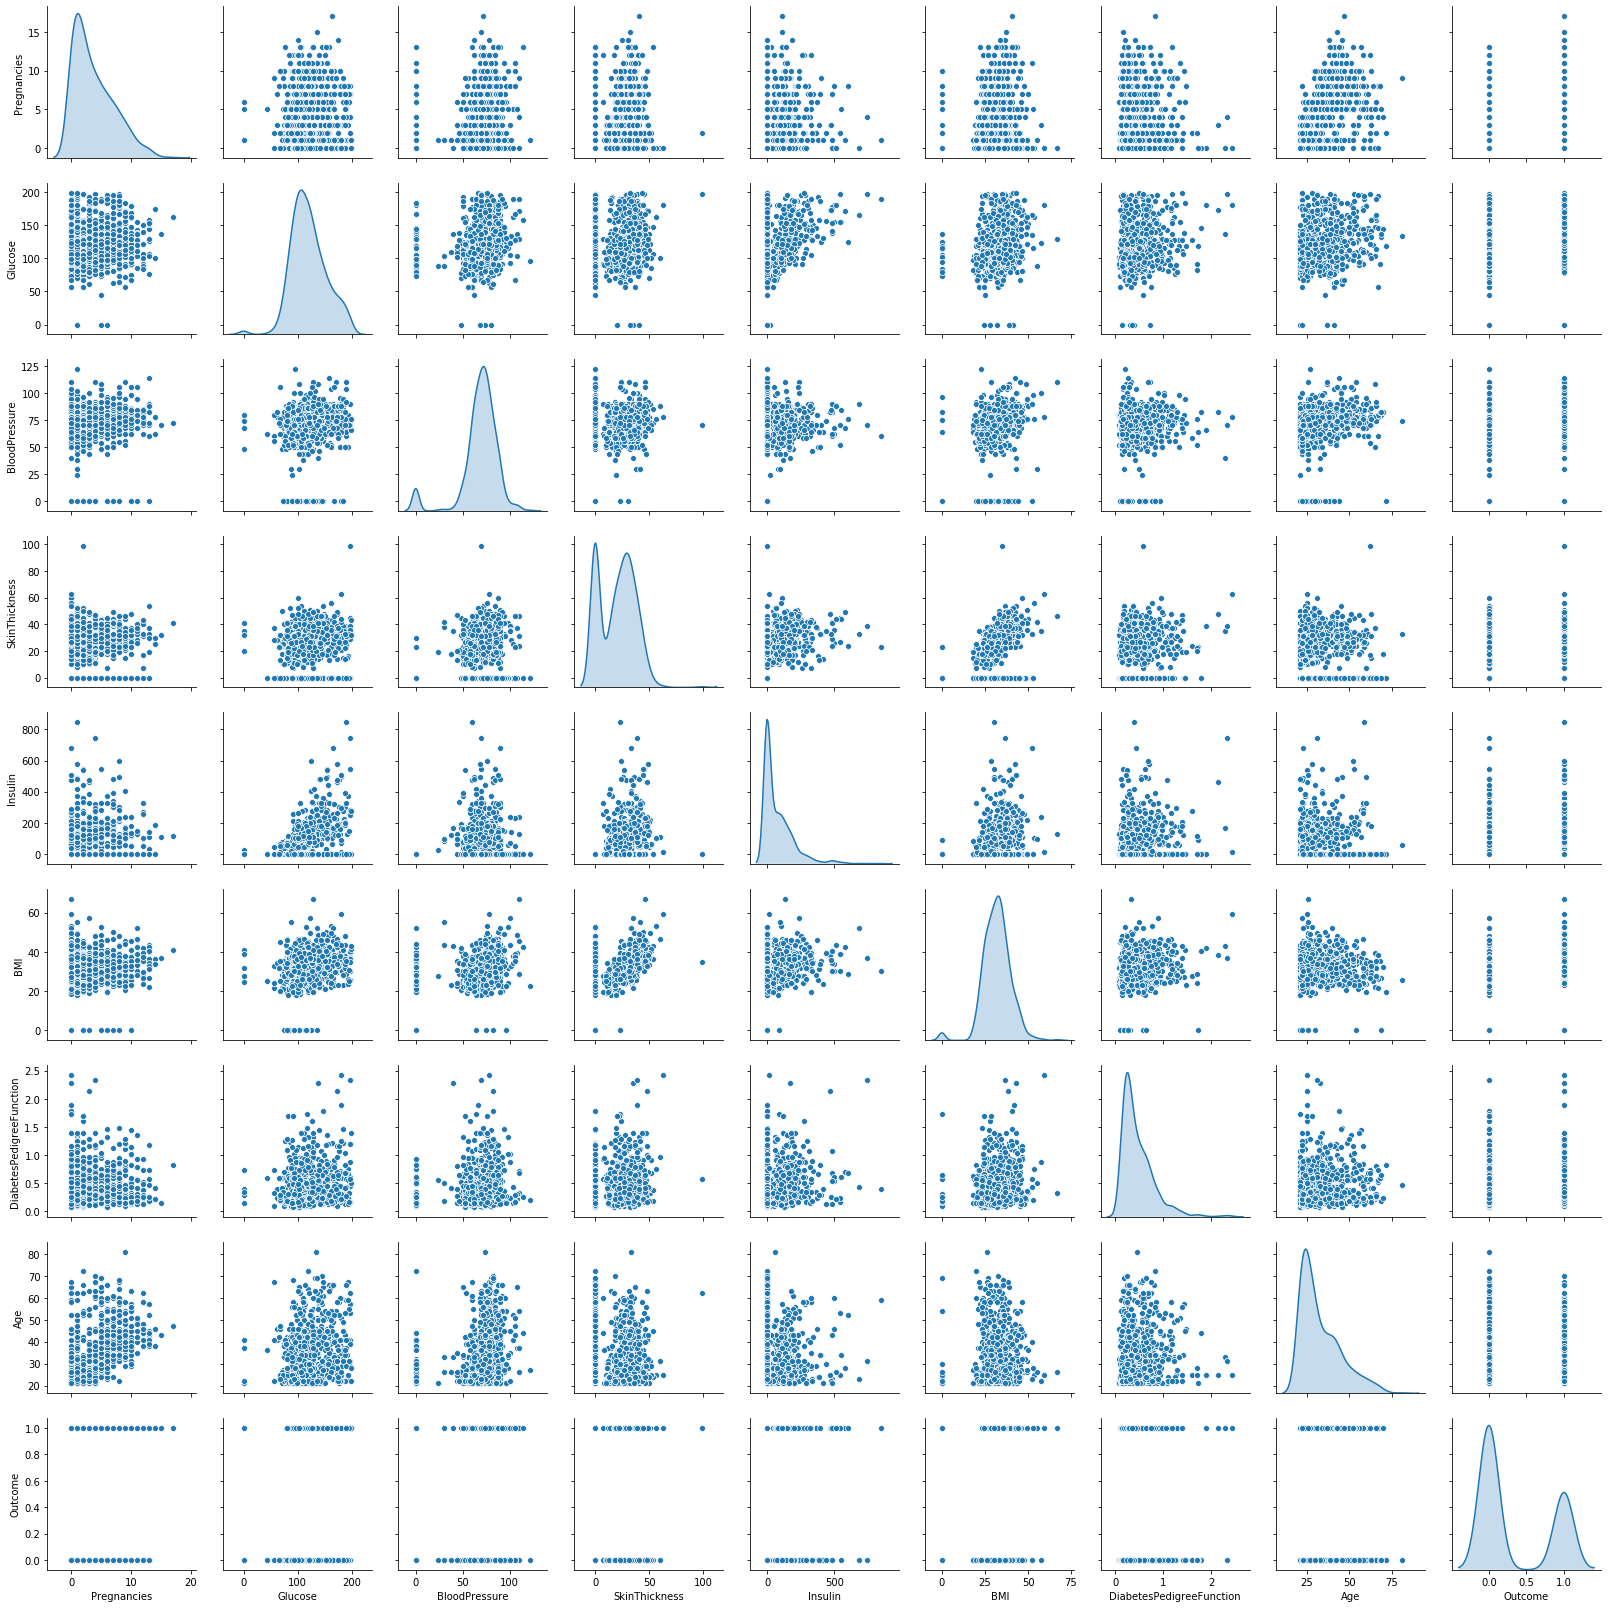

In [20]:
sns.pairplot(df,diag_kind="kde")

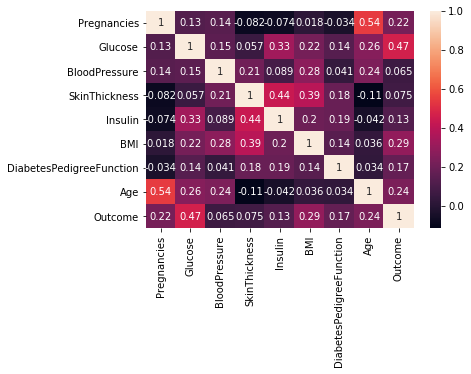

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
x=df.drop("Outcome",axis=1)
y=pd.DataFrame(df["Outcome"])

In [17]:
def full_cluster(size):
    from sklearn.cluster import KMeans
    cluster_range = range( 1, 10)
    cluster_errors = []
    cluster_sil_scores = []
    for num_clusters in cluster_range:
      clusters = KMeans( num_clusters, n_init = 8)
      clusters.fit(x)
      labels = clusters.labels_                     # capture the cluster lables
      centroids = clusters.cluster_centers_         # capture the centroids
      cluster_errors.append( clusters.inertia_ )    # capture the intertia
    # combine the cluster_range and cluster_errors into a dataframe by combining them
    clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
    # print(clusters_df[0:15])

    plt.figure(figsize=(12,6))# Elbow plot
    plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

    kmeans = KMeans(n_clusters=size)# Number of clusters
    kmeans = kmeans.fit(x)# Fitting the input data
    labels = kmeans.predict(x) # Getting the cluster labels
    centroids = kmeans.cluster_centers_# Centroid values
    print("Centroid values")
    print("sklearn")
    print(centroids)

    prediction= kmeans.predict(x)
    x["group"] = prediction
    x.head()

    for i in cluster_range:
        points = np.array(x.loc[x['group'] == i])
    #     print(points)

    sns.pairplot(x,diag_kind="kde",hue="group")

Centroid values
sklearn
[[2.70718232e+00 1.02917127e+02 6.89889503e+01 2.67900552e+01
  7.91491713e+01 3.10116022e+01 4.70624309e-01 2.80110497e+01
  6.35359116e+00]
 [4.15909091e+00 1.50386364e+02 7.30454545e+01 2.98863636e+01
  3.02772727e+02 3.55272727e+01 5.75795455e-01 3.38636364e+01
  5.29545455e+00]
 [4.39480519e+00 1.19012987e+02 6.74000000e+01 1.19714286e+01
  6.44155844e-01 3.09636364e+01 4.21366234e-01 3.55480519e+01
  3.03376623e+00]
 [3.11111111e+00 1.65833333e+02 7.34444444e+01 3.56666667e+01
  5.48833333e+02 3.69611111e+01 6.60666667e-01 3.45555556e+01
  4.66666667e+00]
 [3.80000000e+00 1.34264286e+02 7.21500000e+01 3.11214286e+01
  1.67935714e+02 3.43407143e+01 5.55464286e-01 3.32928571e+01
  1.45714286e+00]]


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


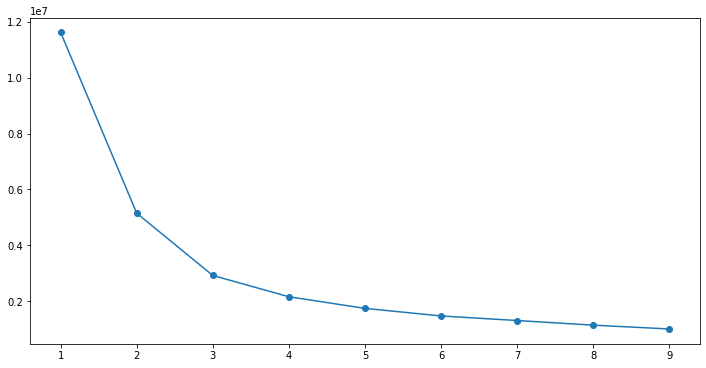

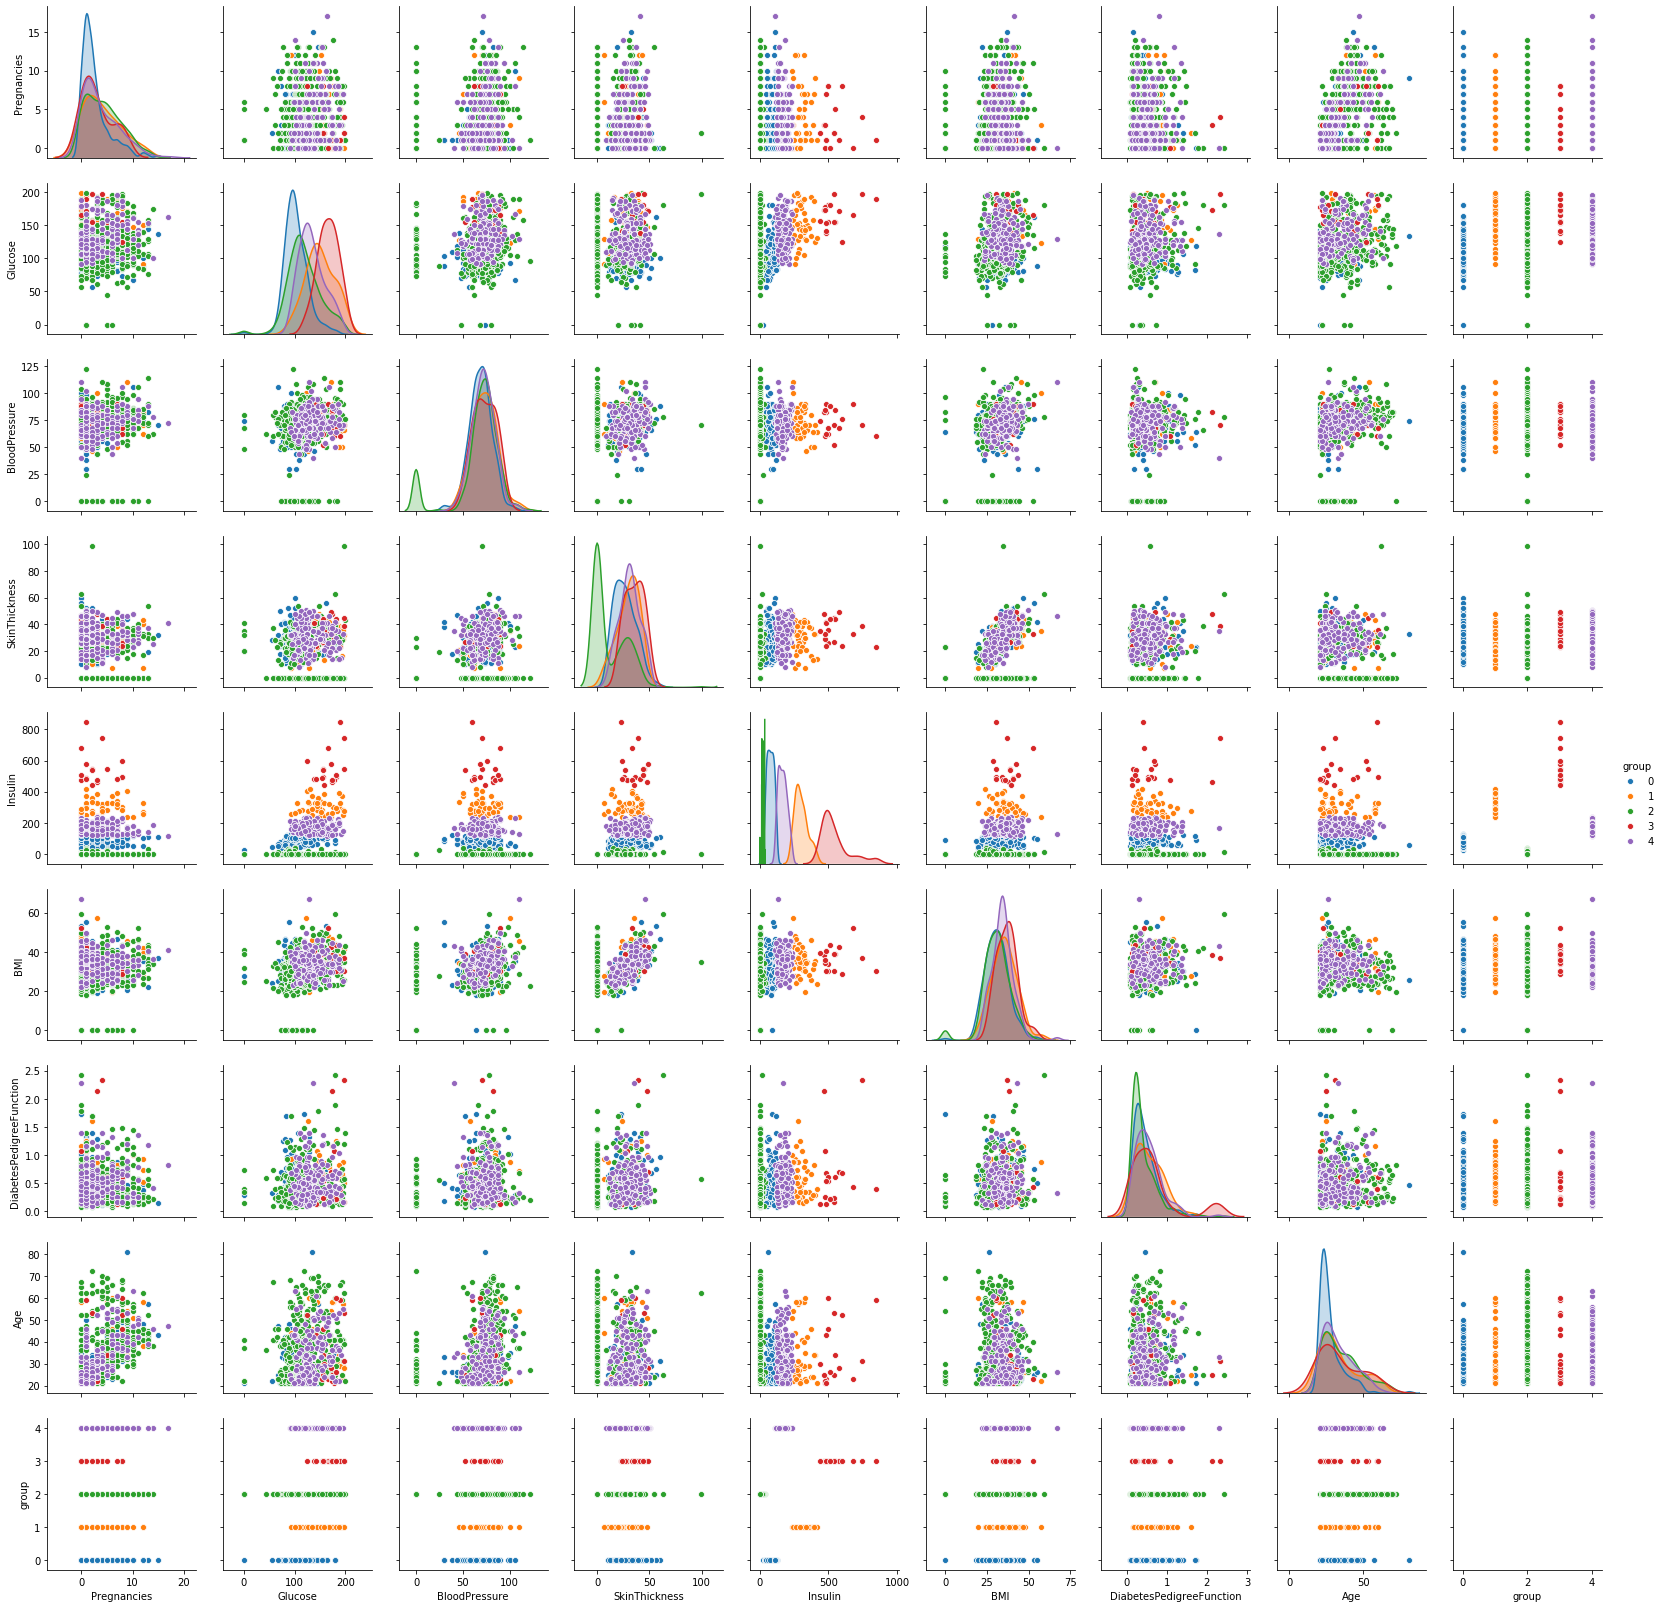

In [19]:
full_cluster(5)

Centroid values
sklearn
[[4.23980815e+00 1.16381295e+02 6.75155875e+01 1.28633094e+01
  4.00479616e+00 3.07964029e+01 4.17800959e-01 3.47889688e+01
  1.84652278e+00]
 [3.54385965e+00 1.39754386e+02 7.26666667e+01 3.12105263e+01
  2.24035088e+02 3.49877193e+01 5.96491228e-01 3.38947368e+01
  3.00000000e+00]
 [3.45833333e+00 1.63000000e+02 7.08333333e+01 3.28333333e+01
  5.09166667e+02 3.59000000e+01 6.07375000e-01 3.35416667e+01
  2.50000000e+00]
 [3.27699531e+00 1.14892019e+02 7.01173709e+01 2.84600939e+01
  1.02610329e+02 3.22910798e+01 4.95779343e-01 2.98262911e+01
  1.20187793e+00]]


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


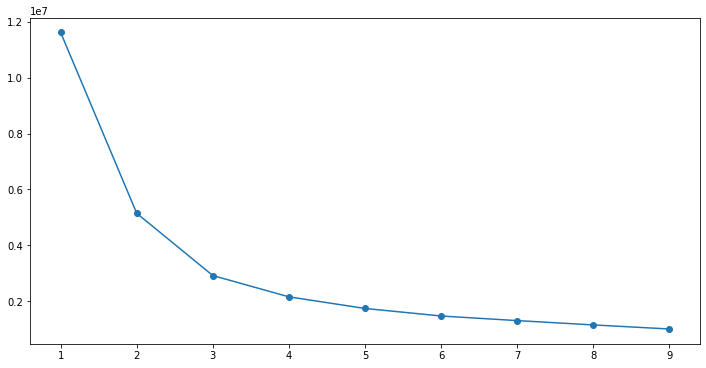

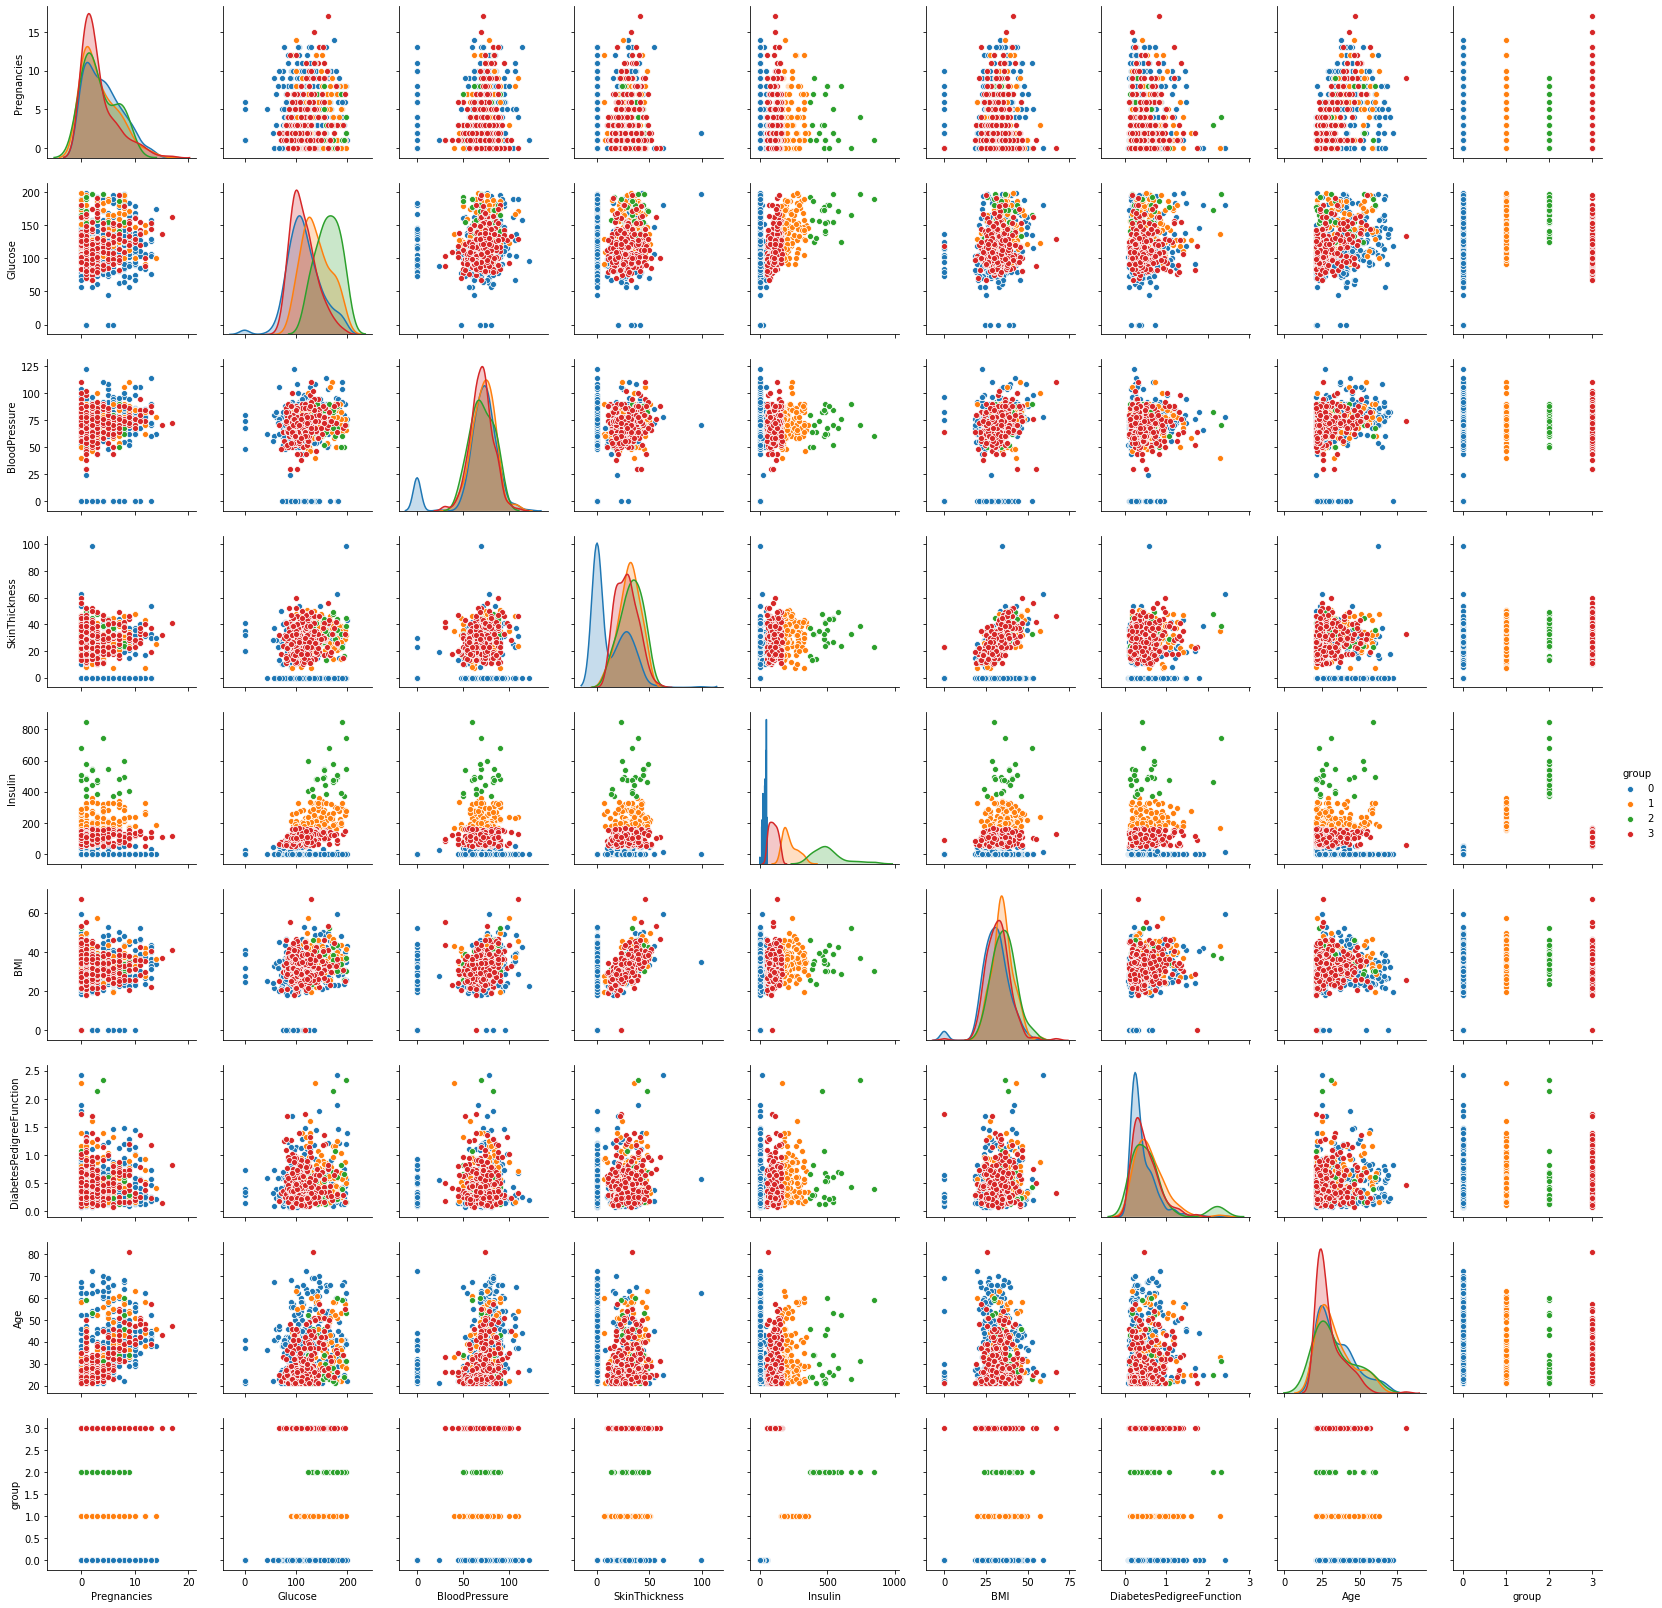

In [21]:
full_cluster(4)

Centroid values
sklearn
[[3.52765957e+00 1.29327660e+02 7.14468085e+01 3.03063830e+01
  1.59102128e+02 3.39893617e+01 5.40276596e-01 3.19021277e+01
  2.14893617e+00]
 [3.98181818e+00 1.14008081e+02 6.77717172e+01 1.49979798e+01
  1.44000000e+01 3.08054545e+01 4.31931313e-01 3.37595960e+01
  4.72727273e-01]
 [4.02631579e+00 1.58447368e+02 7.20000000e+01 3.22631579e+01
  4.41289474e+02 3.51078947e+01 5.69210526e-01 3.47631579e+01
  1.63157895e+00]]


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


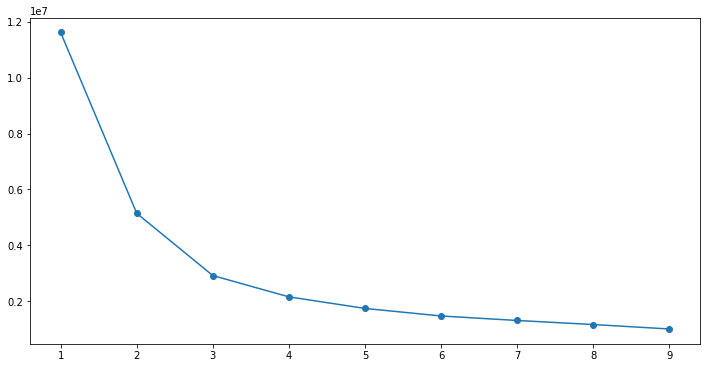

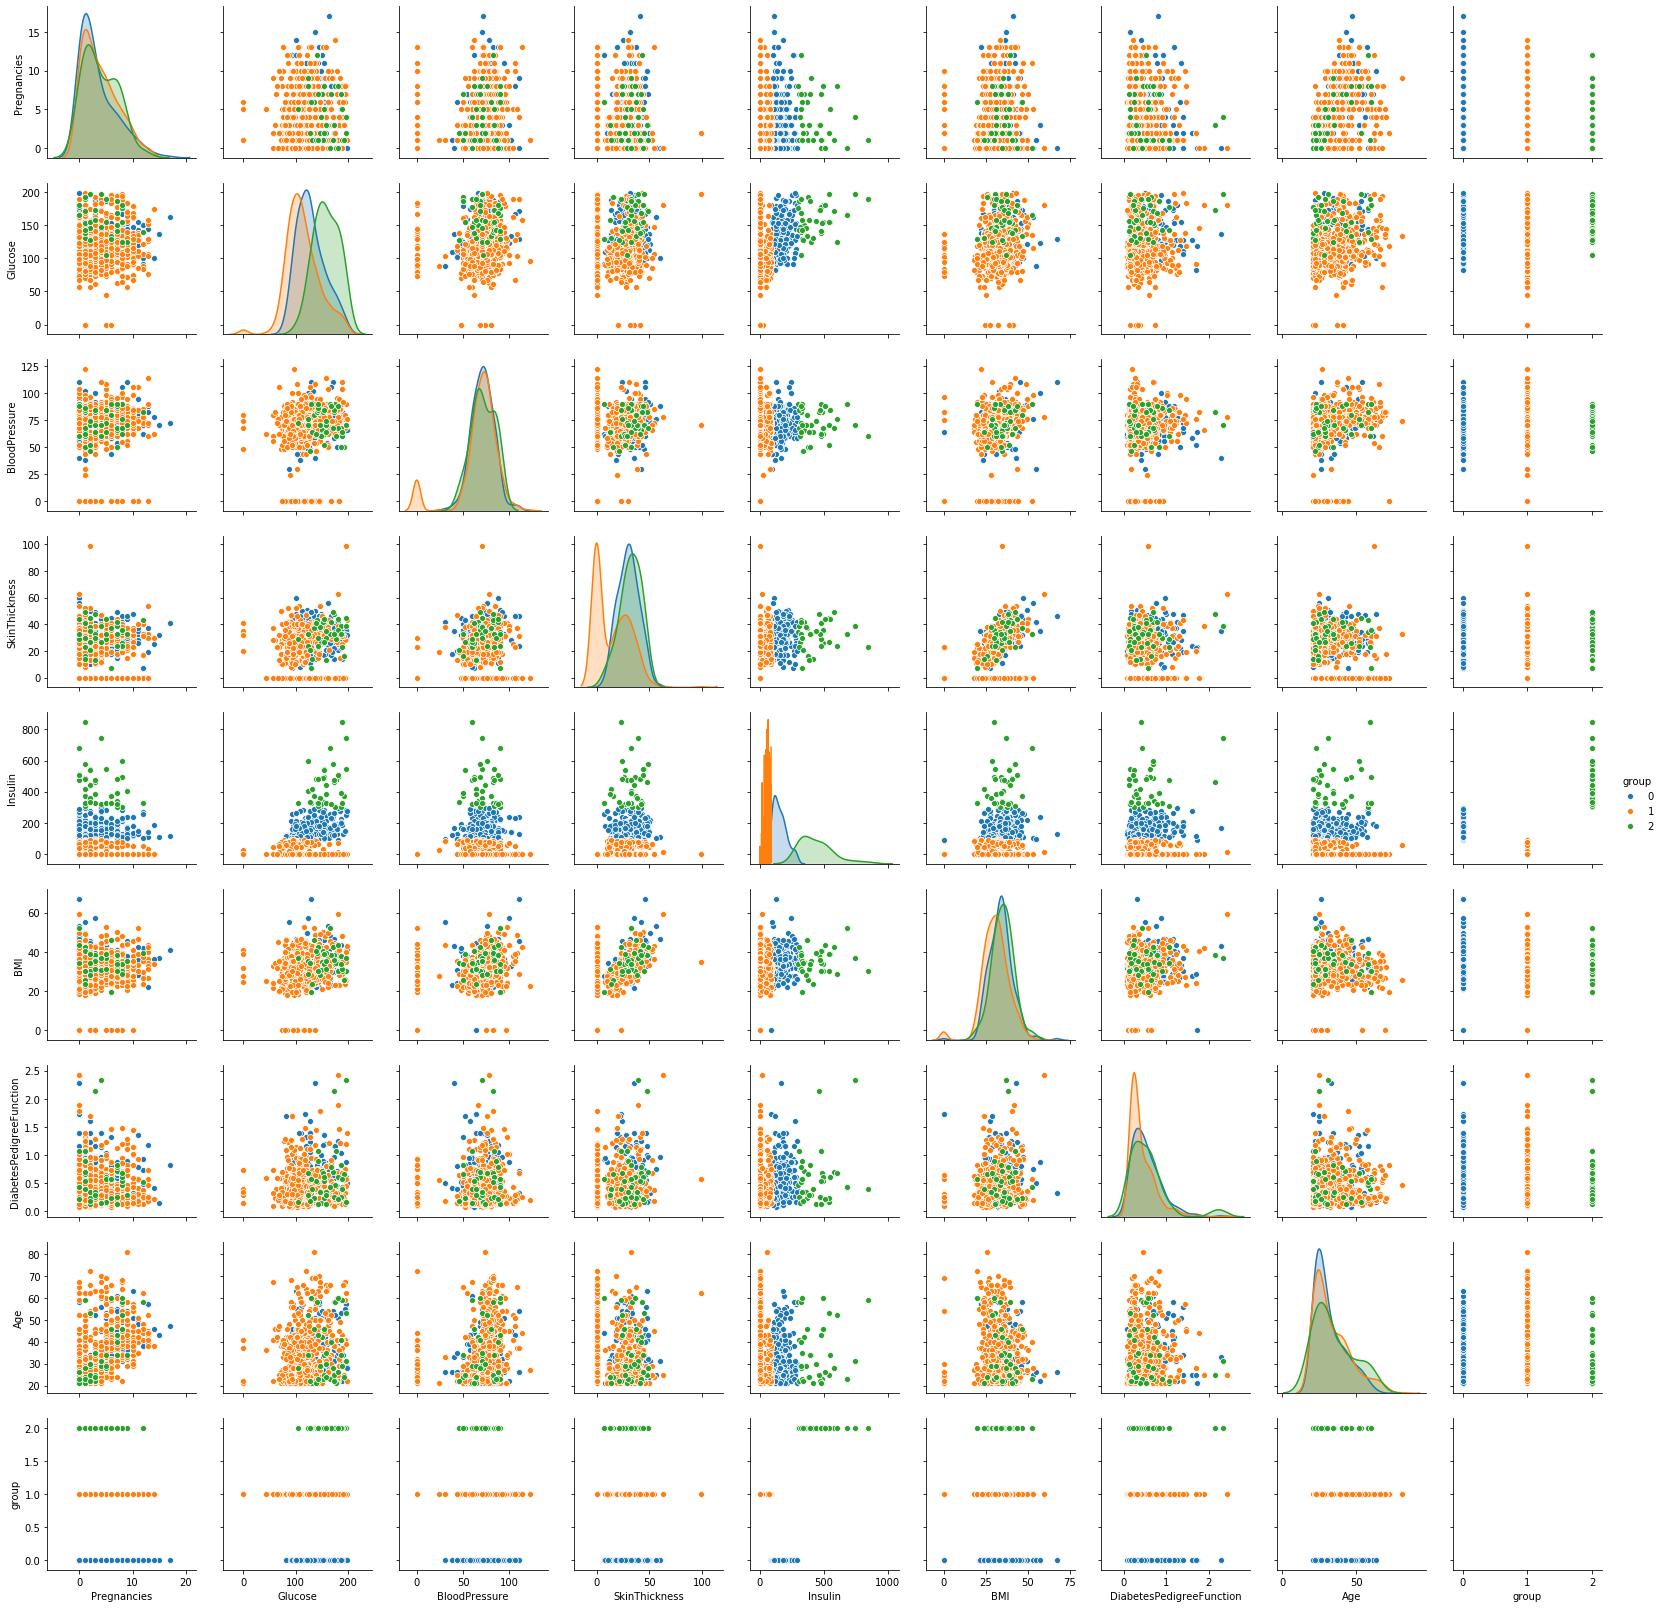

In [22]:
full_cluster(3)

Centroid values
sklearn
[[  3.7030303  141.46060606  72.78787879  31.2        253.70909091
   34.98545455   0.59724848  33.7030303    0.46060606]
 [  3.88391376 115.26699834  68.09784411  17.6185738   32.21227197
   31.17363184   0.43757048  33.11442786   0.82089552]]


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


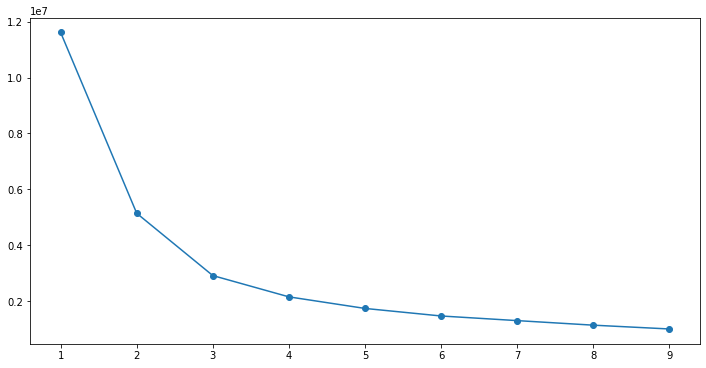

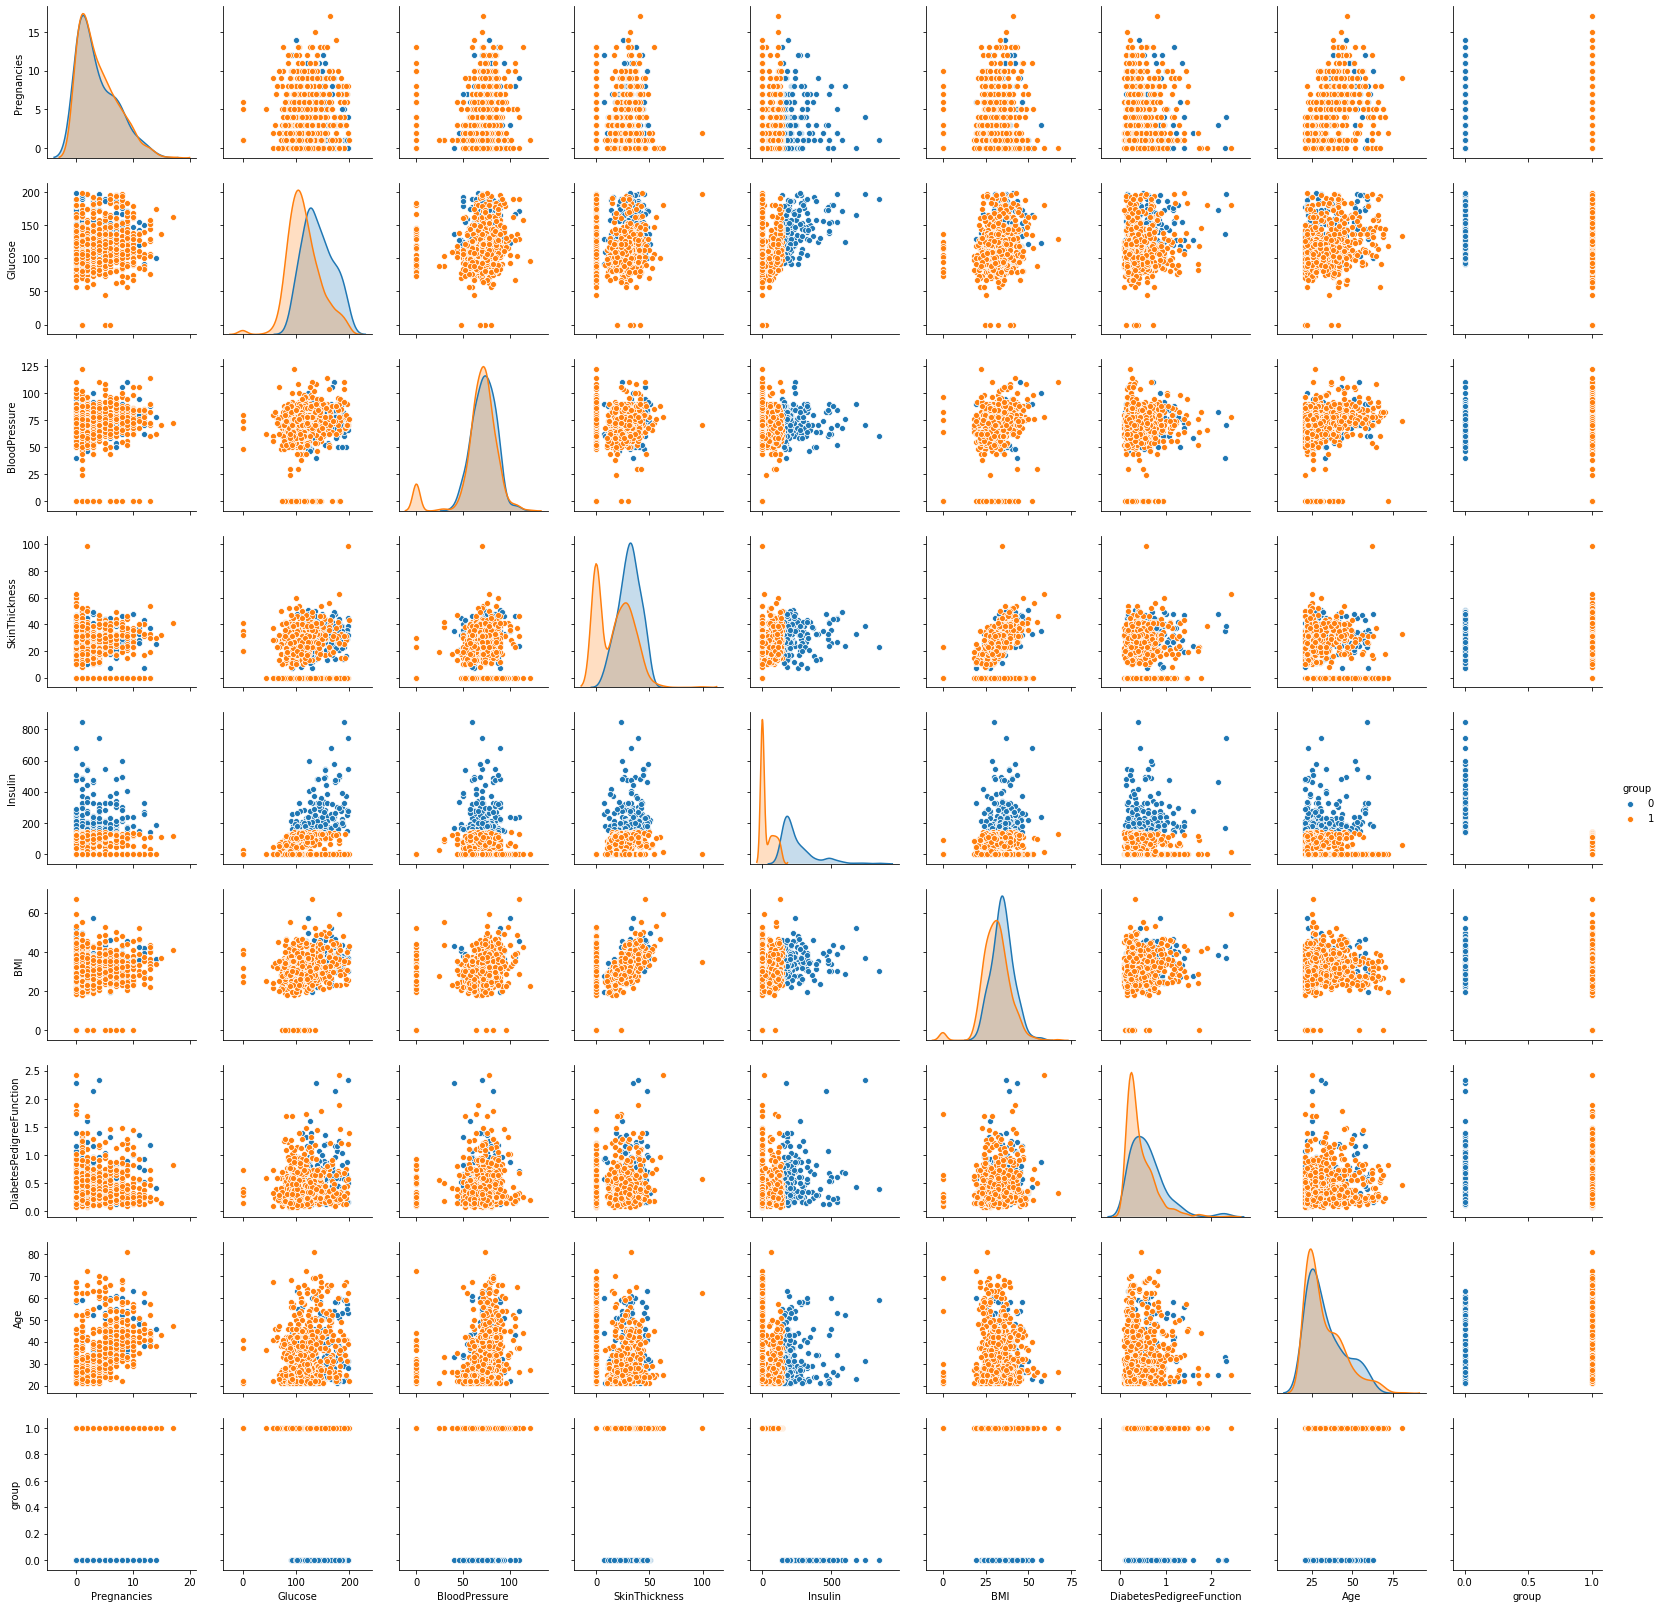

In [24]:
full_cluster(2)

In [ ]:
#################################################### DecisionTree ##################################################

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3,stratify=y,random_state=42)

dtree = DecisionTreeClassifier(max_depth=2, random_state=42)
dtree.fit(X_train, y_train)

print("Decision Tree Score= ",dtree.score(X_test, y_test))

#prune the decision tree
from sklearn.model_selection import GridSearchCV
params={"criterion":["gini","entropy"],"max_depth":[2,3,4,5],
        "max_features":["auto","sqrt","log2"],"splitter":["best","random"]}#ISLR by springer Series
grid=GridSearchCV(estimator=dtree,param_grid=params,cv=5)
#cv=Cross Validation
grid.fit(x,y)

print("Grid best parameters: ",grid.best_params_)#find best parameter

Decision Tree Score=  0.7316017316017316
Grid best parameters:  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'splitter': 'best'}


In [64]:
dtree_best=DecisionTreeClassifier(criterion= 'entropy',
max_depth=2,
max_features='auto',
splitter='best',
random_state=42)

dtree_best.fit(X_train, y_train)
print("Decision Tree with best parameters Score= ",dtree_best.score(X_test, y_test))

Decision Tree with best parameters Score=  0.7316017316017316


In [ ]:
#################################################### Random Forest ##################################################

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7489177489177489

In [25]:
################################################ PCA ###########################################################

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [102]:
X_centered = (x - x.mean(axis=0))/np.std(x)

pca = PCA(n_components=x.shape[1])
pca.fit(X_centered)

X_pca = pca.transform(X_centered)
print("Shape of X_pca is ",X_pca.shape)

print("pca.components: ",pca.components_)
print()
print("pca.explained_variance: ",pca.explained_variance_)
print()
print("pca.explained_variance_ratio: ",pca.explained_variance_ratio_)

Shape of X_pca is  (768, 9)
pca.components:  [[ 0.01973962  0.33090414  0.22334584  0.39770972  0.50928663  0.33489945
   0.23454011  0.07285357 -0.50020915]
 [ 0.59788093  0.25407525  0.29347461 -0.19079879 -0.16684219  0.04910872
  -0.04184671  0.64173134  0.10786281]
 [-0.0886081  -0.28244336  0.50873794  0.36729342 -0.30933692  0.5363987
  -0.01366802 -0.11035456  0.35053926]
 [-0.03029011  0.02842892 -0.16771392 -0.06261704 -0.19278352  0.02720797
   0.94718708  0.05650044  0.16722447]
 [ 0.43519338 -0.70702269 -0.08936772  0.39539481  0.15351129 -0.27814481
   0.10200232  0.124288   -0.14007054]
 [ 0.28957317  0.09972121 -0.73025913  0.18906381 -0.08181307  0.54192772
  -0.16060704 -0.00986559  0.10444403]
 [-0.0446098   0.44162082 -0.05648665  0.66894523 -0.12194447 -0.46631625
  -0.05404714  0.03468216  0.3403782 ]
 [-0.59817215 -0.19526702 -0.18011164  0.09641556  0.00914569  0.07566151
  -0.07881156  0.74138549 -0.02554782]
 [ 0.01827562 -0.04880781  0.01229279 -0.13316004  0

In [ ]:
sns.pairplot(pd.DataFrame(X_pca),diag_kind='kde')

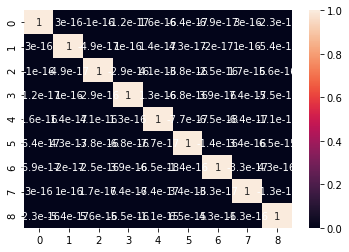

In [79]:
sns.heatmap(pd.DataFrame(X_pca).corr(),annot=True)

In [103]:
X_pca

array([[ 3.55152189e-01,  1.54650624e+00,  4.56421128e-01, ...,
         1.13609763e+00,  5.28099259e-01, -2.39161439e-01],
       [-1.15639025e+00, -9.07647746e-01,  5.62091698e-01, ...,
         5.00607767e-01,  6.20776544e-01, -2.43649895e-01],
       [-7.53696978e-01,  1.42469292e+00, -1.45644336e+00, ...,
         6.97195086e-01, -1.42336976e+00, -1.10595702e-01],
       ...,
       [-4.43531627e-01,  4.57114262e-02, -1.56116616e-01, ...,
         5.95334986e-01, -4.34734307e-01,  4.75077763e-01],
       [-1.27800318e+00,  5.70153490e-01, -5.38163931e-01, ...,
        -2.91680872e-01,  1.29410196e+00,  4.63271364e-04],
       [-8.91030455e-01, -1.21587535e+00,  9.77961993e-01, ...,
         4.40788772e-01,  8.71337488e-02, -2.69955385e-01]])

In [104]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(pca.transform(X_train), y_train)
print("DecisionTree with PCA, Score: ",model.score(pca.transform(X_test), y_test))


from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(pca.transform(X_train), y_train)
print("Random forest with PCA, Score: ",rf.score(pca.transform(X_test), y_test))

from sklearn.model_selection import GridSearchCV
params={"criterion":["gini","entropy"],"max_depth":[2,3,4,5],
        "max_features":["auto","sqrt","log2"],"splitter":["best","random"]}#ISLR by springer Series
grid=GridSearchCV(estimator=dtree,param_grid=params,cv=5)
#cv=Cross Validation
grid.fit(x,y)
print("grid.best_params: ",grid.best_params_)

dtree_best=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=2,
 max_features='auto',
 splitter='best')
dtree_best.fit(pca.transform(X_train), y_train)
print()
print("DecisionTree with grid.best_params with PCA: ",dtree_best.score(pca.transform(X_test), y_test))

DecisionTree with PCA, Score:  0.6666666666666666
Random forest with PCA, Score:  0.7316017316017316


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


grid.best_params:  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'splitter': 'best'}

DecisionTree with grid.best_params with PCA:  0.6623376623376623


In [105]:
######################################################## KNN ##################################################

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)

knn_pred=knn.fit(X_train,y_train).predict(X_test)
print("PCA with KNN: ",rf.score(pca.transform(X_test), y_test))

PCA with KNN:  0.7316017316017316


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
